In [5]:
import numpy as _np
import matplotlib.pyplot as _plt
from scipy.integrate import quad as integrate

In [3]:
delta_g=2*_np.pi*50e3
eta=0.12
phi_diff=0
nbar=0

In [18]:
def omega_m(K):
    "Please refer to eq.4.39 in sepiol thesis. K is the loops of the gate"
    return delta_g/(2*_np.sqrt(K))

def fidelity(omega,K):
    """Please refer to eq. (4.54) in sepiol thesis"""
    fidelity = 1/2 + 1/2*_np.sin(2*_np.pi*K*(omega/delta_g)**2)
    return fidelity

def expected_F(sigma, K):
    def pmf(omega):
        normalization = 1/(sigma*_np.sqrt(2*_np.pi))
        deviation = ((omega-omega_m(K))/sigma)**2
        return normalization * _np.exp(-1/2*deviation)
    def integrand(omega):
        return fidelity(omega, K)*pmf(omega)
    return integrate(integrand, -_np.inf, _np.inf)[0]
    

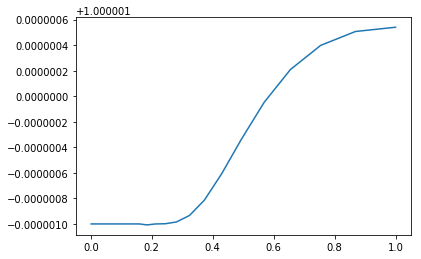

In [25]:
k=1
stds1 = _np.logspace(-3, 0)
fs1 = [expected_F(omega_m(1)*std, k) for std in stds1]

_plt.plot(stds1, 1-_np.asarray(fs1))
#_plt.loglog()

In [16]:
_np.shape(fs1)

(50, 2)

In [17]:
expected_F(omega_m(1)*stds1[0], k)

(0.0, 0.0)